In [9]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg
from bitcoin_deep_learning.trainer import cv_train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
from bitcoin_deep_learning.metrics import *
api = ApiCall()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,2018-02-01,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,...,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,0.007848,-0.096230
1,2018-02-02,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,...,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,0.012923,-0.013968
2,2018-02-03,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,...,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,0.008710,-0.078603
3,2018-02-04,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,...,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,0.017680,-0.012779
4,2018-02-05,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,...,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.023407,0.224166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2022-03-03,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,...,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,0.815945,NaN
1492,2022-03-04,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,...,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,0.739765,NaN
1493,2022-03-05,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,...,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,0.651643,NaN
1494,2022-03-06,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,...,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,0.696718,NaN


In [20]:
model = RandomForestReg()
cv_train(model,train_df)
read_result().sort_values(by="date")

  3%|████▏                                                                                                                                            | 1/35 [00:07<04:17,  7.58s/it]


KeyboardInterrupt: 

In [ ]:
for warm_start in  [True,False]:
    for bootstrap in [True,False]:
        for criterion in ["squared_error", "absolute_error", "poisson"]:
            model = RandomForestReg(warm_start=warm_start,
                                   max_features=max_features,
                                   bootstrap=bootstrap,
                                   criterion=criterion,
                                   max_depht=max_depht,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)

            cv_train(model,train_df)

In [ ]:
X0 = [[i+5,-2*i]for i in range(1001)]
X1 = np.sin(np.arange(1001))

In [ ]:
df = pd.DataFrame(X0)
df["date"] = X1
df

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
past_reality[0]

In [ ]:
plt.plot(reality[0])

In [ ]:
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
df

In [ ]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df.drop(columns="date"),data=None)

In [ ]:
X_train, Y_train, X_test,Y_test = X_train_list[0], Y_train_list[0], X_test_list[0],Y_test_list[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#X_train_scaled =  scaler.fit_transform(X_train[:,-1,:])
#X_test_scaled = scaler.transform(X_test[:,-1,:])
X_train_scaled =  (X_train[:,-1,:])
X_test_scaled = (X_test[:,-1,:])
X_train_scaled

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)
plt.plot(Y_pred)
plt.plot(Y_test)

In [ ]:
Y_train

In [ ]:
X_train[:,-1,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[:,-1,:])

In [ ]:
X_train[:,-1,:]

In [ ]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
df = ApiCall().read_local()
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df,data=None)



In [ ]:
cross_val_trade(model,df)

In [ ]:
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
ct = 0
preds = []
computed_reality = []
for past_prices, diffs in zip(past_reality,prediction_diff):
    preds.append(past_prices * diffs+ past_prices)
preds  

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
#df  =scaler.fit_transform(df.drop(columns="date"))

In [ ]:
df[df.columns[1]].shape

In [ ]:
df

In [ ]:

df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
for i in range(10):
    plt.plot(prediction_diff[i],c="r")
    plt.plot(reality_diff[i])
    plt.show()


In [ ]:
df

In [ ]:
fold_score, score= train(model,df)
print(fold_score,score)

In [ ]:
for counter in range(20):
    alpha = 0.015 * random.random()
    l1 = random.random()*0.01
    # Instanciate model
    regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
    # Train and Fit data using the crossval
    val_score, score = train(regression_model,df);
    print(val_score,score)
    past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
    for i in range(len(reality)):
        plt.plot(prediction_diff[i],c="r")
        plt.plot(reality_diff[i])
        plt.show()

In [ ]:
from bitcoin_deep_learning.trainer import read_result
read_result().sort_values(by="date",ascending=False)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))-1):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(prediction_diff[i],c="r")
            plt.plot(reality_diff[i])
            plt.show()

In [ ]:
read_result().sort_values(by="date",ascending=False).head(50)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(reality[i])
            plt.plot()

In [ ]:
x = np.eye(260,3,31)
x.reshape(260,)

In [ ]:
read_result().sort_values(by="mean_score",ascending=False).head(50)

In [ ]:
from sklearn.metrics import mean_absolute_error
def train(model,
          df,
          save:bool=True,
          precision:int=5
          ):
    reality,prediction = cross_val(model,df)
    fold_score = [round(mean_absolute_error(Y_true,Y_pred),precision)
                            for Y_true,Y_pred in zip(reality,prediction)]
    score =round(np.mean(np.array(fold_score)),precision)
    # Option to save results
    if save == True :
        file_path = os.path.join(ROOT_DIR,
                                        "cross_val_data",
                                        'test.csv')
        # Check if file is there and create it otherwise
        if not os.path.isfile(file_path):
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
        # Append a new line with current CV results
        with open(file_path , 'a', newline='') as csvfile:
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S")})
            print("Training done")
        return fold_score, score


In [ ]:
train_df = ApiCall().read_local()

In [ ]:
read_result(file="CV_trader.csv")

In [ ]:

model = LinearRegressionBaselineModel()
train(model,train_df)

In [ ]:
ROOT_DIR = "/Users/Zalo/code/AlexandreLaizet/bitcoin_deep_learning"


In [ ]:
file_path = os.path.join(ROOT_DIR,
                        "cross_val_data",
                        'CV_trader.csv')
fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date',
             "roi_hodler", "sharpe_hodler", "roi_trader", "sharpe_trader","roi_whale", "sharpe_whale",
              "roi_hodler_whale",  "sharpe_hodler_whale", "roi_charles", 
                "sharpe_charles"]
pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
read_result(file="CV_trader.csv")

In [ ]:
from bitcoin_deep_learning.metrics import iterate_cross_val_results
iterate_cross_val_results()

In [ ]:
roi_hodler, roi_trader, roi_whale, roi_hodler_whale, roi_charles, sharpe_hodler, sharpe_trader, sharpe_whale, sharpe_hodler_whale, sharpe_charles = iterate_cross_val_results()


In [ ]:
with open(file_path , 'a', newline='') as csvfile:
            #fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S"),
                            "roi_hodler":roi_hodler
                            "sharpe_hodler": sharpe_hodler
                            "roi_trader": roi_trader
                            "sharpe_trader": sharpe_trader
                            "roi_whale": roi_whale
                            "sharpe_whale": sharpe_whale
                            "roi_hodler_whale": roi_hodler_whale
                            "sharpe_hodler_whale": sharpe_hodler_whale
                            "roi_charles": roi_charles
                            "sharpe_charles":sharpe_charles})
            print("Training done")

In [ ]:
train_df= ApiCall().read_local()

In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
for warm_start in  [True,False]:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                    for max_depht in [None,True]:
                        if max_depht :
                            max_depht = np.random.randint(1,1000)
                        print("oui")
                        min_samples_split = random.randint(2,100)
                        min_samples_leaf = random.randint(2,100)
                        model = RandomForestReg(warm_start=warm_start,
                                               max_features=max_features,
                                               bootstrap=bootstrap,
                                               criterion=criterion,
                                               max_depht=max_depht,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf)

                        cv_train(model,train_df)

In [7]:
model = LinearRegressionBaselineModel()
cv_train(model,train_df,with_trader=False)
read_result(file="cv_train.csv").sort_values(by="date")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:01<00:00, 27.89it/s]


Training done


,name,fold_score,mean_score,min_score,max_score,hyperparams,date
0,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.0351,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:05:10
1,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.0351,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:05:36
2,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.0351,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:05:53
3,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.0351,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:05:57


In [8]:
model = RandomForestReg()
cv_train(model,train_df,with_trader=True)
read_result().sort_values(by="date")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [02:08<00:00,  3.67s/it]


[0.27702074865321724, 0.39866031865659446, 0.33400412784029365, 0.33443788814979536, 0.14175623511513047, -0.2824240613868797, -0.29076824191104333, -0.24699767200798428, -0.12283953354687571, -0.060139076467191965, 0.16689361278589554, -0.20495794683518231, -0.2654374044503006, 0.025969350391875423, 0.29655375213090895, 0.1080712096662022, 0.14216230666052754, 0.12772166178061983, 0.023539343735346607, 0.283302223859873, 0.40087990847917987, 0.2890920102664558, 0.3651169244895911, 0.37344415648179985, 0.38341082597163556, -0.14638556686848347, -0.24133489844179024, -0.38243218377026755, 0.20217003805619904, 0.2192444658295618, 0.3554664065473805, 0.18448470378028614]
Training with trader done


,name,fold_score,mean_score,min_score,max_score,hyperparams,date,roi_hodler,sharpe_hodler,roi_trader,sharpe_trader,roi_whale,sharpe_whale,roi_hodler_whale,sharpe_hodler_whale,roi_charles,sharpe_charles
0,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.03510,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:04:27,0.076063,2.692379,0.0,0.0,0.0,0.0,0.0,0.0,0.099678,2.089733
1,RandomForestReg,"[0.07313, 0.07909, 0.10424, 0.12256, 0.11114, ...",0.10006,0.06343,0.17766,None,10-03 12:08:28,0.076063,2.692379,0.0,0.0,0.0,0.0,0.0,0.0,0.099678,2.089733


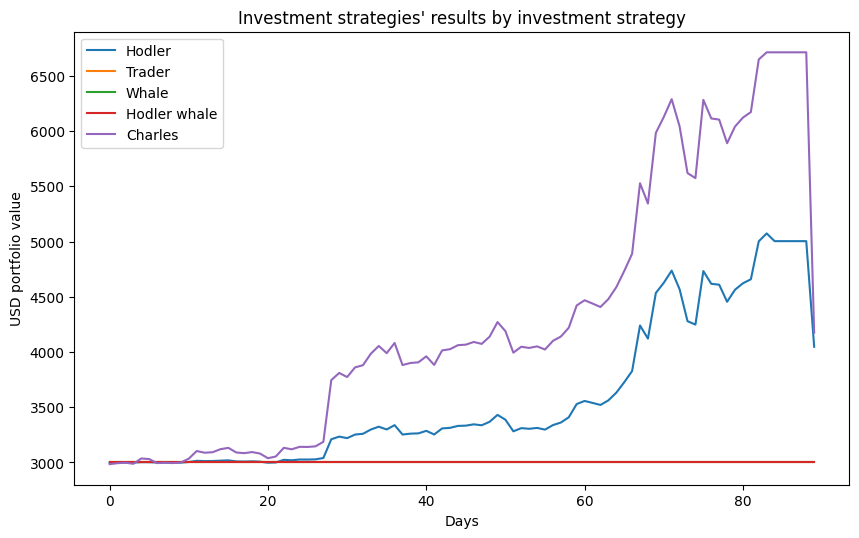

In [12]:
plot_portolio_positions(fold = 1, positions=iterate_portfolio_positions(model = LinearRegressionBaselineModel(alpha = 0.05 , l1_ratio = 0.0001), df = ApiCall().read_local(data = 'train')))

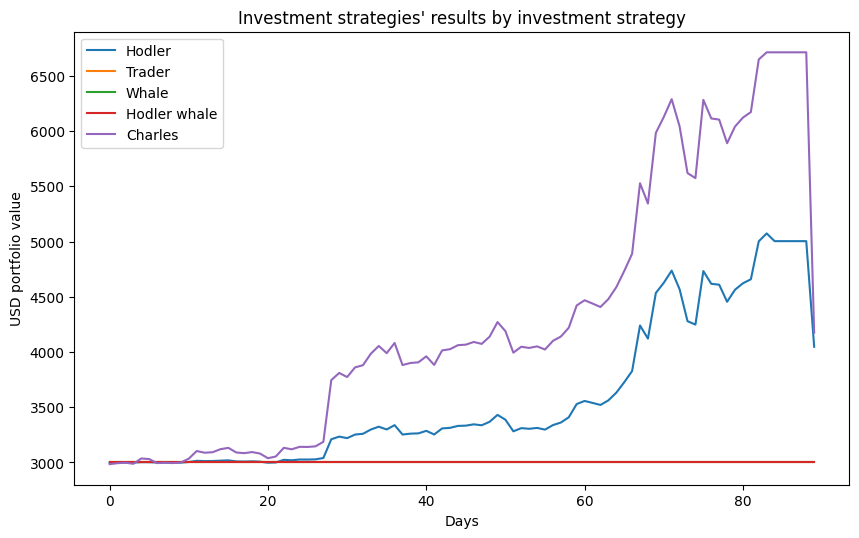

In [13]:
plot_portolio_positions(fold = 1, positions=iterate_portfolio_positions(model = RandomForestReg(), df = ApiCall().read_local(data = 'train')))